In [1]:
from pathlib import Path
import sys
import pickle

import numpy as np
import cvxpy as cp
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

In [2]:
sys.path.append(
    "/data/yonatan/myproject/scripts/indicator_config/indicator_configuration/modules",
)
from convex_optimization_mod import ConvexOptMod as ConvexOpt
from utils import tol, eps

In [3]:
case = 39  # 39-bus case

WORK_DIR = Path().absolute()
DATA_DIR = WORK_DIR / "data" / f"IEEE{case}"
FIM_DIR = DATA_DIR / "FIMs"
RESULT_DIR = WORK_DIR / "results" / f"IEEE{case}"
if not RESULT_DIR.exists():
    RESULT_DIR.mkdir(parents=True)

In [4]:
# Model information
nparams = 2 * case

# Remove optimal buses from the original problem

## Setup

In [5]:
# preassigned_buses = np.array([20, 23, 25, 29], dtype=int)
# candidate_buses = np.array(
#     [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15,
#      16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 39,]
#     dtype=int,
# )
preassigned_buses = np.array([], dtype=int)
candidate_buses = np.arange(case) + 1

In [6]:
# Load the preassigned FIM and sum them up
F_preassigned = np.zeros((nparams, nparams))
# for bus in preassigned_buses:
#     J = np.load(DATA_DIR / "FIMs" / f"jacobian_bus{bus}.npy")
#     ff = J.T @ J
#     # ff = np.loadtxt(DATA_DIR / "FIMs" / f"fim_bus{bus}.csv", delimiter=",")
#     F_preassigned += ff

# Comment out the following line if we DON'T have preassigned buses
candidate_buses = np.sort(np.unique(np.append(preassigned_buses, candidate_buses)))
remove_buses = [2, 3, 4, 8, 12, 15, 16, 20, 21, 23, 25, 26, 29, 31, 32, 39]
candidate_buses = np.array(list(set(candidate_buses) - set(remove_buses)))
candidate_buses

array([ 1,  5,  6,  7,  9, 10, 11, 13, 14, 17, 18, 19, 22, 24, 27, 28, 30,
       33, 34, 35, 36, 37, 38])

In [7]:
# Configurations
nconfigs = len(candidate_buses)
configs = candidate_buses
config_ids = np.array([f"bus{ii}" for ii in configs])

# Load configuration FIMs
fim_configs_tensor = np.empty((nconfigs, nparams, nparams))
for ii, bus in enumerate(configs):
    ff = np.loadtxt(DATA_DIR / "FIMs" / f"fim_bus{bus}.csv", delimiter=",")
    fim_configs_tensor[ii] = ff

In [8]:
# Matrix to impose tolerance for the non-zero eigenvalues
lambda_tol = 1e-5
F_tol = lambda_tol * np.eye(nparams)

# Constant matrix on the RHS of the PSD constraint
F0 = F_tol - F_preassigned

# Convex optimization

In [9]:
# Use the result from the MISDP problem to help the calculation here
opt_buses = np.loadtxt(
    RESULT_DIR / "ieee39_opt_nopreassigned.txt", delimiter=",", dtype=int
)
idx_misdp = []
for bus in opt_buses:
    loc = np.where(candidate_buses == bus)[0]
    if len(loc) > 0:  # and bus not in preassigned_buses:
        idx_misdp.append(loc[0])
configs[idx_misdp]

array([13, 18])

Tolerance: 1.8189894035458565e-12
Lower bound: 1e-05
0
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:07 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 19 02:44:07 PM: Compiling problem (target solver=SDPA).
(CVXPY) May 19 02:44:07 PM: Reduction cha

(CVXPY) May 19 02:44:09 PM: Optimal value: 3.901e-04
(CVXPY) May 19 02:44:09 PM: Compilation took 1.216e-01 seconds
(CVXPY) May 19 02:44:09 PM: Solver (including time spent in interface) took 1.377e+00 seconds
Violation: -0.0
1
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:09 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------

/home/byu.local/yonatank/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1388: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


(CVXPY) May 19 02:44:09 PM: Applying reduction SDPA
(CVXPY) May 19 02:44:09 PM: Finished problem compilation (took 1.228e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 19 02:44:09 PM: Invoking solver SDPA  to obtain a solution.
---------- SDPAP Start ----------
Converting CLP format to LMI standard form...

phase.value  = pdFEAS    
   Iteration = 69
          mu = +4.1149959956196083e-09
relative gap = +5.9090723733871368e-07
        gap  = +5.9090723733871368e-07
     digits  = +2.8194089296473188e+00
objValPrimal = +3.9017301308593317e-04
objValDual   = +3.8958210584859445e-04
p.feas.error = +8.2987412497459445e-09
d.feas.error = +1.5945820683484343e-08
total time   = 1.182065
  main loop time = 1.182059
      total time = 1.182065
file  check time = 0.000000
file cha

(CVXPY) May 19 02:44:11 PM: Optimal value: 1.647e+01
(CVXPY) May 19 02:44:11 PM: Compilation took 1.228e-01 seconds
(CVXPY) May 19 02:44:11 PM: Solver (including time spent in interface) took 2.159e+00 seconds
Violation: 5.839343818816681e-08
2
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:11 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:13 PM: Optimal value: 4.850e+00
(CVXPY) May 19 02:44:13 PM: Compilation took 1.260e-01 seconds
(CVXPY) May 19 02:44:13 PM: Solver (including time spent in interface) took 2.070e+00 seconds
Violation: 9.145568871127887e-08
3
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:13 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:15 PM: Optimal value: 1.184e+01
(CVXPY) May 19 02:44:15 PM: Compilation took 1.033e-01 seconds
(CVXPY) May 19 02:44:15 PM: Solver (including time spent in interface) took 1.605e+00 seconds
Violation: 8.09029223423883e-08
4
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:15 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  


(CVXPY) May 19 02:44:17 PM: Optimal value: 1.596e+01
(CVXPY) May 19 02:44:17 PM: Compilation took 1.089e-01 seconds
(CVXPY) May 19 02:44:17 PM: Solver (including time spent in interface) took 1.556e+00 seconds
Violation: 8.835780094445609e-08
5
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:17 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:19 PM: Optimal value: 1.681e+01
(CVXPY) May 19 02:44:19 PM: Compilation took 1.157e-01 seconds
(CVXPY) May 19 02:44:19 PM: Solver (including time spent in interface) took 1.457e+00 seconds
Violation: 8.808317131935623e-08
6
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:19 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:20 PM: Optimal value: 1.696e+01
(CVXPY) May 19 02:44:20 PM: Compilation took 1.213e-01 seconds
(CVXPY) May 19 02:44:20 PM: Solver (including time spent in interface) took 1.498e+00 seconds
Violation: 8.730990666863585e-08
7
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:20 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:22 PM: Optimal value: 1.699e+01
(CVXPY) May 19 02:44:22 PM: Compilation took 9.343e-02 seconds
(CVXPY) May 19 02:44:22 PM: Solver (including time spent in interface) took 1.368e+00 seconds
Violation: 8.690292025790001e-08
8
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:22 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:23 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:23 PM: Compilation took 8.086e-02 seconds
(CVXPY) May 19 02:44:23 PM: Solver (including time spent in interface) took 1.356e+00 seconds
Violation: 8.658529673741332e-08
9
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:23 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:25 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:25 PM: Compilation took 9.982e-02 seconds
(CVXPY) May 19 02:44:25 PM: Solver (including time spent in interface) took 1.571e+00 seconds
Violation: 8.64887256734503e-08
10
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:25 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:26 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:26 PM: Compilation took 7.992e-02 seconds
(CVXPY) May 19 02:44:26 PM: Solver (including time spent in interface) took 1.220e+00 seconds
Violation: 8.645159396285026e-08
11
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:26 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:28 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:28 PM: Compilation took 6.978e-02 seconds
(CVXPY) May 19 02:44:28 PM: Solver (including time spent in interface) took 1.453e+00 seconds
Violation: 8.643133202596446e-08
12
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:28 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:30 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:30 PM: Compilation took 7.096e-02 seconds
(CVXPY) May 19 02:44:30 PM: Solver (including time spent in interface) took 1.868e+00 seconds
Violation: 8.642128632867436e-08
13
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:30 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:31 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:31 PM: Compilation took 8.136e-02 seconds
(CVXPY) May 19 02:44:31 PM: Solver (including time spent in interface) took 1.119e+00 seconds
Violation: 8.641614285710964e-08
14
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:31 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:33 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:33 PM: Compilation took 8.541e-02 seconds
(CVXPY) May 19 02:44:33 PM: Solver (including time spent in interface) took 1.612e+00 seconds
Violation: 8.641331536178132e-08
15
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:33 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:35 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:35 PM: Compilation took 1.252e-01 seconds
(CVXPY) May 19 02:44:35 PM: Solver (including time spent in interface) took 1.585e+00 seconds
Violation: 8.64119677318135e-08
16
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:35 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:35 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:35 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:35 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:36 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:36 PM: Compilation took 6.684e-02 seconds
(CVXPY) May 19 02:44:36 PM: Solver (including time spent in interface) took 1.080e+00 seconds
Violation: 8.641138497378872e-08
17
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:36 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:38 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:38 PM: Compilation took 3.100e-01 seconds
(CVXPY) May 19 02:44:38 PM: Solver (including time spent in interface) took 1.110e+00 seconds
Violation: 8.64110004981182e-08
18
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:38 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:38 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  

(CVXPY) May 19 02:44:39 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:39 PM: Compilation took 6.964e-02 seconds
(CVXPY) May 19 02:44:39 PM: Solver (including time spent in interface) took 1.122e+00 seconds
Violation: 8.641071874449892e-08
19
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) May 19 02:44:39 PM: Your problem has 23 variables, 2 constraints, and 0 parameters.
(CVXPY) May 19 02:44:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 19 02:44:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 19 02:44:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                 

(CVXPY) May 19 02:44:40 PM: Optimal value: 1.700e+01
(CVXPY) May 19 02:44:40 PM: Compilation took 7.253e-02 seconds
(CVXPY) May 19 02:44:40 PM: Solver (including time spent in interface) took 1.059e+00 seconds
Violation: 8.641047132667633e-08


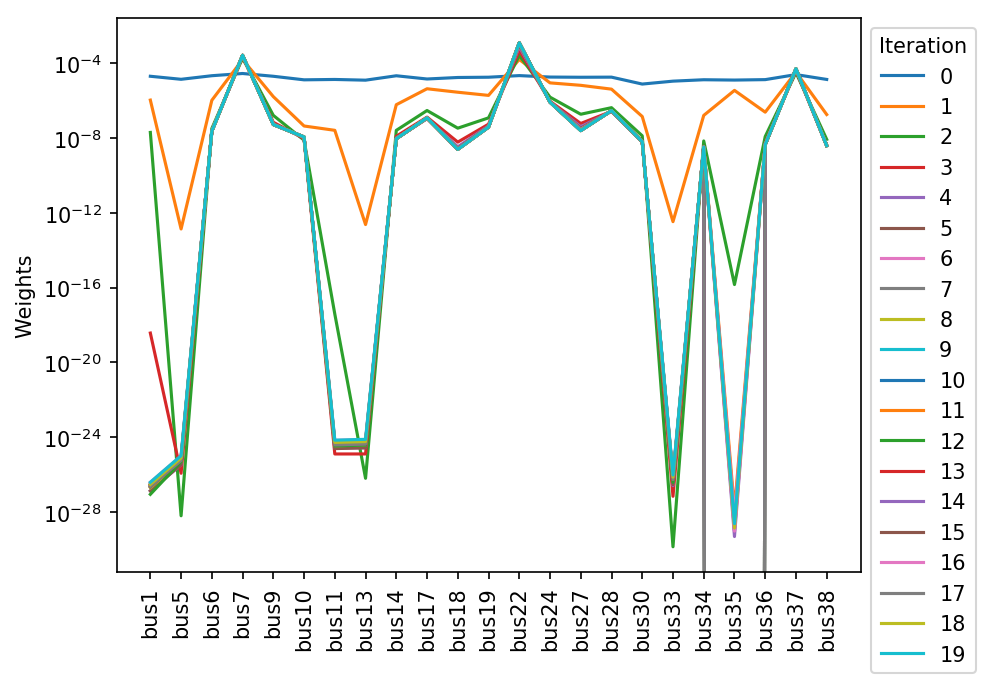

In [10]:
# Convex optimization
# Settings
cvx_tol = eps ** 0.75
print("Tolerance:", cvx_tol)
print("Lower bound:", lambda_tol)

solver = dict(
    verbose=True,
    solver=cp.SDPA,
    epsilonStar=cvx_tol,
    gammaStar=0.5,
    lambdaStar=1e3
)

plt.figure(dpi=150)
wopt = np.ones(nconfigs)
colors = ["r", "g", "b", "k"]
for ii in range(20):
    print(ii)
    cvxopt = ConvexOpt(fim_configs_tensor, np.array(config_ids), F0, wopt + 1e-12)

    try:
        # Solve
        # ig = np.zeros(nconfigs)
        # ig[idx_misdp] = 1.0
        # cvxopt.wm.value = ig
        cvxopt.solve(solver=solver)

        wopt = cvxopt.result["wm"]
        dual = cvxopt.result["dual_wm"]
        print("Violation:", cvxopt.constraints[1].violation())

    except Exception:
        break

    plt.plot(wopt, label=ii)

plt.yscale("log")
plt.xticks(range(nconfigs), config_ids, rotation=90)
plt.ylabel("Weights")
plt.legend(title="Iteration", bbox_to_anchor=(1, 1))
plt.show()

## Extracting the weights

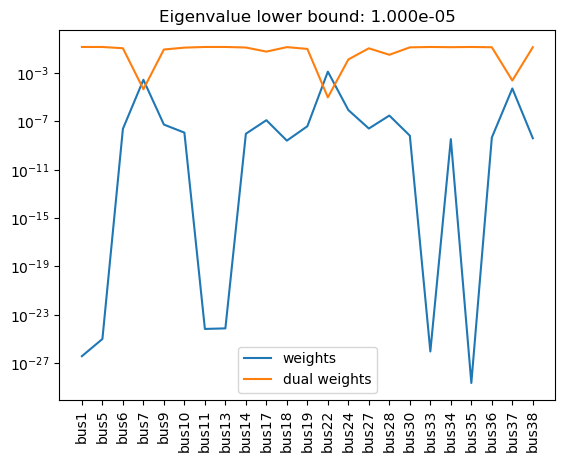

In [11]:
# Plot the weights of the last step
plt.figure()
plt.title(f"Eigenvalue lower bound: {lambda_tol:0.3e}")
plt.plot(wopt, label="weights")
plt.plot(dual, label="dual weights")
plt.yscale("log")
plt.xticks(range(nconfigs), config_ids, rotation=90)
plt.legend()
plt.show()

In [12]:
# Get the optimal buses
idx_wopt = np.where(wopt > cvx_tol)[0]  # Index to the optimal buses
print("Optimal buses:")
_ = [print(f'{config_ids[ii]} \t {wopt[ii]}') for ii in idx_wopt]

Optimal buses:
bus6 	 2.343772064719517e-08
bus7 	 0.0002684490786934554
bus9 	 5.324543614801918e-08
bus10 	 1.148111088102983e-08
bus14 	 9.274473602929126e-09
bus17 	 1.218252310117618e-07
bus18 	 2.4965783779069364e-09
bus19 	 3.860119466410795e-08
bus22 	 0.0012591588363982816
bus24 	 8.389319276741591e-07
bus27 	 2.5044038127927748e-08
bus28 	 2.9477386256683547e-07
bus30 	 6.440021056821631e-09
bus34 	 3.3439502176202886e-09
bus36 	 4.503850158096011e-09
bus37 	 5.112809209118853e-05
bus38 	 3.9543534119497526e-09


Eigenvalues:
[9.91358960e-06 9.92208224e-06 1.03222731e-05 1.05138854e-05
 1.09670257e-05 1.11152771e-05 1.21192602e-05 1.25707600e-05
 1.34213234e-05 1.53954869e-05 1.86558364e-05 1.90392611e-05
 1.90997706e-05 1.98505904e-05 2.57071066e-05 2.60442451e-05
 2.74987261e-05 2.93868267e-05 3.72156560e-05 3.89154878e-05
 4.25773242e-05 4.43987463e-05 4.52595411e-05 4.89625935e-05
 5.24953174e-05 6.49269911e-05 6.59918582e-05 6.87952542e-05
 1.34212834e-04 1.57127760e-04 2.01332442e-04 2.04112755e-04
 3.49089007e-04 3.87288382e-04 6.00143467e-04 6.42705664e-04
 1.27443385e-03 1.43608309e-03 1.70515517e-03 1.90360580e-03
 6.68764942e-03 7.67182004e-03 1.06236533e-01 1.13847580e-01
 3.28079845e-01 4.35498185e-01 4.72831398e-01 5.81602441e-01
 6.75045460e+00 6.91018572e+00 7.35721008e+00 7.80609047e+00
 1.08387163e+01 1.16751326e+01 1.18188918e+01 1.22949541e+01
 1.29642261e+01 1.39663600e+01 5.31325218e+01 5.45184661e+01
 7.21705953e+01 7.37948838e+01 7.42417012e+01 7.97511594e+01
 1.14349503

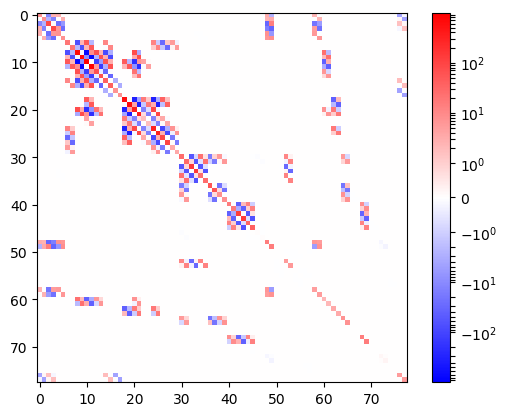

In [13]:
# Test the optimal buses
weighted_fims_configs = fim_configs_tensor * wopt.reshape((-1, 1, 1))
I = np.sum(weighted_fims_configs[idx_wopt], axis=0)
print("Eigenvalues:")
print(np.linalg.eigvalsh(I))

plt.figure()
cbound = np.max([-np.min(I), np.max(I)])
plt.imshow(I, cmap="bwr", norm=mpl.colors.SymLogNorm(1e0, vmin=-cbound, vmax=cbound))
plt.colorbar()
plt.show()